In [1]:
"""
arj1
Arjun Srivastava
AMATH 301 B
"""

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Problem 1: Training

# Load data
training_data = np.genfromtxt('training_images.csv', delimiter=',')
print(training_data.shape) # First 53 rows = Boris, Last 40 rows = Nandor

(93, 40000)


Text(0.5, 1.0, 'Favorite One')

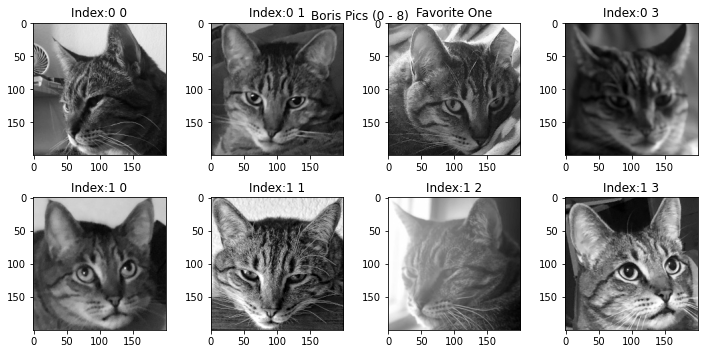

In [3]:
# a)

# Show imagess

# Boris

fig, axes = plt.subplots(2, 4, figsize=(10, 5))
fig.suptitle('Boris Pics (0 - 8)')
fig.tight_layout()

for k in range(8):
    img = np.reshape(training_data[k, :], (200, 200), order='F')
    ax = (k // 4, k % 4)
    axes[ax[0], ax[1]].set_title('Index:' + str(ax[0]) + ' ' + str(ax[1]))
    axes[ax[0], ax[1]].imshow(img, cmap='gray')

axes[0][2].set_title('Favorite One')  # Index: 0, 2

Text(0.5, 1.0, 'Favorite One')

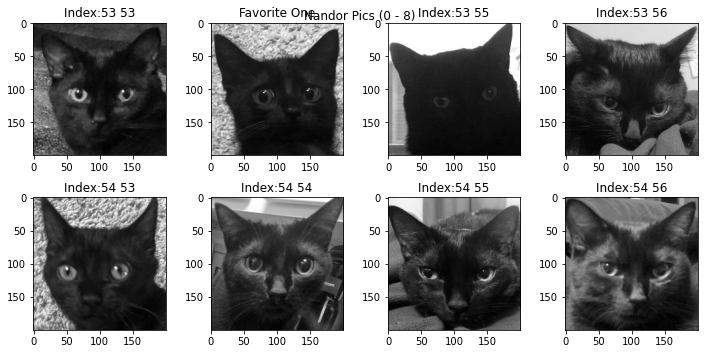

In [4]:
# Nandor

nandor_training = training_data[53:]

fig, axes = plt.subplots(2, 4, figsize=(10, 5))
fig.suptitle('Nandor Pics (0 - 8)')
fig.tight_layout()

for k in range(8):
    img = np.reshape(nandor_training[k, :], (200, 200), order='F')
    ax = (k // 4, k % 4)
    axes[ax[0], ax[1]].set_title('Index:' + str(ax[0] + 53) + ' ' + str(ax[1] + 53))
    axes[ax[0], ax[1]].imshow(img, cmap='gray')

axes[0][1].set_title('Favorite One')

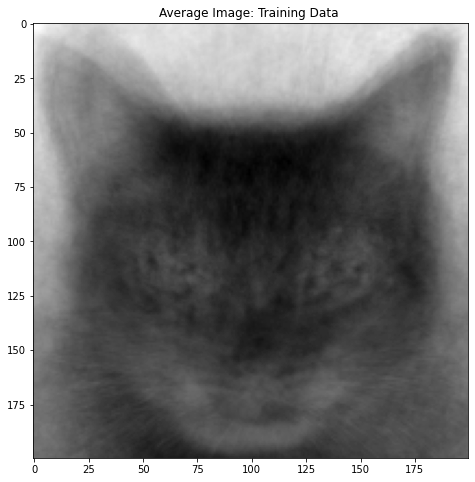

In [5]:
# b)

avg_img = np.mean(training_data, axis=0)
plt.figure(figsize=(8, 8))
plt.title('Average Image: Training Data ')
plt.imshow(np.reshape(avg_img, (200, 200), order='F'), cmap='gray')

# Data with  mean subtracted
X = training_data - np.ones((93, 1)) @ avg_img.reshape((1, -1))

In [6]:
# c)

# Reduced SVD
U, s, Vt = np.linalg.svd(X, full_matrices=False)
V = Vt.T

scores = X @ V

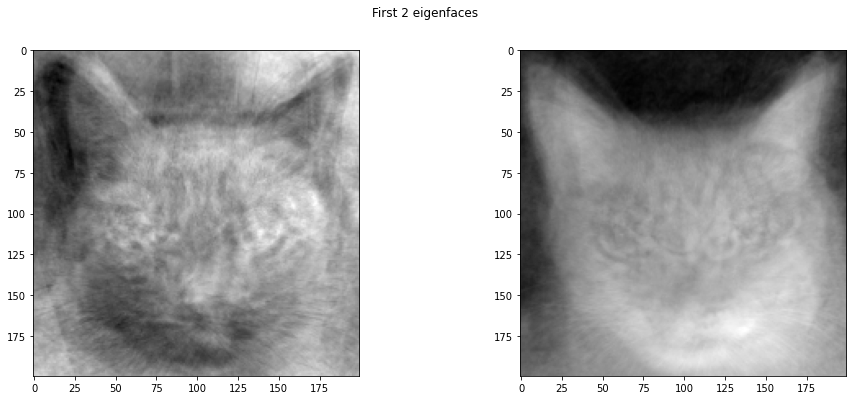

In [7]:
# d)

# Display first 2 eigenfaces

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle('First 2 eigenfaces')
for k in range(2):
    img = np.reshape(V[:, k], (200, 200), order='F')
    axs[k].imshow(img, cmap='gray')

Text(0.5, 0, 'Number of Observations')

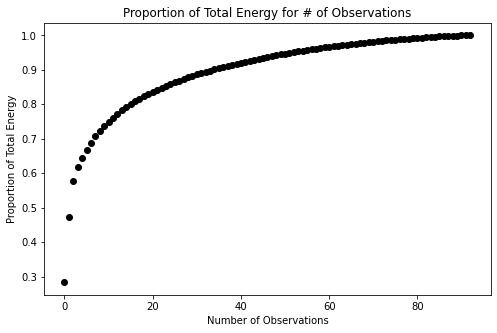

In [8]:
# e)

# Calculate energy
E = np.cumsum(s ** 2) / np.sum(s ** 2)

plt.figure(figsize=(8, 5))
plt.plot(E, 'ko')
plt.title('Proportion of Total Energy for # of Observations')
plt.ylabel('Proportion of Total Energy')
plt.xlabel('Number of Observations')

In [9]:
# f)

# Find k such that Ek > 0.99
for k in range(1, len(s)):
    if E[k] > 0.99:
        print(k)
        break

# k = 78

"""
Is it meaningful? 78 vs 93?
"""

78


'\nIs it meaningful? 78 vs 93?\n'

Text(0.5, 1.0, 'Reconstructed Image')

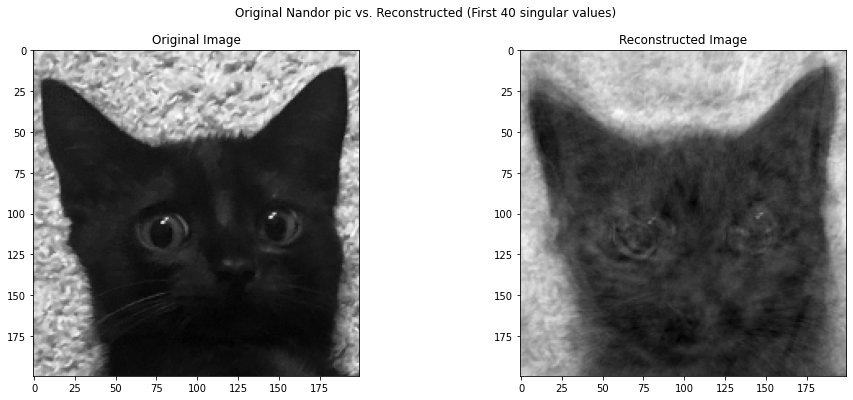

In [10]:
# g)

# Reconstruct image of Nandor from first 40 singular values
N = 40
Uk = U[:, :N]
Sk = np.diag(s[:N])
scores_k = Uk @ Sk
Vk = V[:, :N]
reconstructed_X = scores_k @ Vk.T

img = np.reshape(reconstructed_X[54, :] + avg_img, (200, 200), order='F')
original_img = np.reshape(training_data[54, :], (200, 200), order='F')

# Plot Original vs. Reconstructed
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle('Original Nandor pic vs. Reconstructed (First 40 singular values)')
axs[0].imshow(original_img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(img, cmap='gray')
axs[1].set_title('Reconstructed Image')

In [11]:
# Problem 2: Testing

# Load data
testing_data = np.genfromtxt('testing_images.csv', delimiter=',')
print(testing_data.shape) # First 22 rows = Boris, Last 16 rows = Nandor

(38, 40000)


In [12]:
# a)

# Data with mean subtracted
Y = testing_data - np.ones((testing_data.shape[0], 1)) @ avg_img.reshape((1, -1))

scores_test = Y @ V

In [18]:
# b)

# Testing image
img1 = testing_data[0, :]

# Calculate scores

distances_img1 = np.zeros(scores.shape[0])
score1 = scores_test[0, :]

for k in range(len(distances_img1)):
    distances_img1[k] = np.linalg.norm(score1 - scores[k, :])
    
row_min_score = np.argmin(distances_img1)  # 45th row

"""
Thr 45th row is the one most similar to the test image. This row corresponds to a picture of Boris, which is the correct row
for this testing image.
"""

''

In [24]:
# Proportion of correct guesses if random
prop_rand_boris = 53/93

# c)

# Calculate Boris accuracy

distances = np.zeros(scores.shape[0])
total = 22
correct = 0

for i in range(total):
    score_test = scores_test[i, :]
    for k in range(len(distances)):
        distances[k] = np.linalg.norm(score_test - scores[k, :])
    row_min = np.argmin(distances)
    if row_min < 53:
        correct += 1

print('Proportion Correct:', correct / total) # 22 / 22 = 1
        
"""
100% of the testing images recognized that the cat was Boris and not Nandor. This is much better than the random chance (57%)
"""

45
22
46
43
24
25
17
1
6
41
10
10
22
16
29
26
20
3
44
22
45
17
Proportion Correct: 1.0


'\n\n'

In [27]:
# d)

prop_rand_nandor = 40/93

# Calculate Boris accuracy

distances = np.zeros(scores.shape[0])
total = 16
correct = 0

for i in range(total):
    score_test = scores_test[i + 22, :]
    for k in range(len(distances)):
        distances[k] = np.linalg.norm(score_test - scores[k, :])
    row_min = np.argmin(distances)
    if row_min >= 53:
        correct += 1

print('Correct:', correct)
print('Proportion Correct:', correct / total)
        
"""
14/22, or 0.875 of the testing images were recognized by using the training data. This is not as good as Boris' approximation
rate, but still better than the random chance (0.43)
"""

Correct: 14
Proportion Correct: 0.875


0.43010752688172044